# Imports :

In [1]:
import numpy as np
from numpy.random import shuffle
import pandas as pd
import re
from pywt import cwt 
from os import listdir
from os.path import isfile, join
from numpy.random import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# DataFrame From Train PCA : 

In [2]:
#Command dataset
#mypath = r"pca/pca_csv_phase/"
#Internet dataset
mypath = r"pca/pca_data_csv_train_forest/"
filenames = [f.split(".")[0] for f in listdir(mypath) if isfile(join(mypath, f))]
shuffle(filenames)
     
nothing = [i for i in filenames if i.find("nothing") == 0]

In [3]:
N = 10
L = 30
frequencies = [2 ** (n + (l / L)) for n in range(N) for l in range(L)]

In [4]:
def array_with_matrix():
    info = []
    for name in filenames:
        mtrx = []
        df  = pd.read_csv(mypath + name + ".csv")
        for i in df.columns:
            mx,_ = cwt(df[f'{i}'],frequencies,wavelet='morl')
            mtrx.append(mx)
        mtrx = np.array(mtrx)
        mtrx = mtrx.sum(axis = 0)
        info.append(mtrx)
        
    return info

In [5]:
info = array_with_matrix()

In [6]:
def mtrx_to_dataframe(array,max_shape,names):
    df  = pd.read_csv(mypath + f"{nothing[-1]}" + ".csv")
    mx,_ = cwt(df['0'],frequencies,wavelet='morl') 

    df  = pd.DataFrame()
    for num in range(len(array)-1,-1,-1):
        if array[num].shape[1] > max_shape:
            del array[num]
            del names[num]
        else:
            array[num] = np.concatenate((array[num],mx[:,:(max_shape-array[num].shape[1])]),axis = 1)
            array[num] = array[num].flatten()
    return pd.DataFrame(np.array(array))

In [7]:
#max_shape = max([x.shape[1] for x in inf])
max_shape = 360
    
df = mtrx_to_dataframe(info,max_shape,filenames)
df

,0,1,2,3,4,5,6,7,8,9,...,107990,107991,107992,107993,107994,107995,107996,107997,107998,107999
0,0.612050,0.612463,-0.161368,-1.827437,0.165936,1.795928,-0.206057,6.345938,-6.807228,-6.729004,...,-26.879805,1.685798,-6.335506,32.969061,10.430139,-0.269348,4.469201,-20.805615,1.269640,1.982114
1,3.222742,-1.896380,0.800914,0.242665,-2.738344,1.603751,2.342090,-0.877625,-1.073522,-0.086772,...,-6.770682,-3.443724,32.118264,3.974081,-15.787068,13.608039,-17.923209,-9.221506,13.568159,-15.068391
2,1.161310,0.639840,-0.624572,0.021660,-1.117121,1.072252,0.060238,-0.081964,0.620474,0.242313,...,4.469201,-20.805615,1.269640,1.982114,11.653838,-23.663326,37.474475,-8.695776,-0.801804,7.545460
3,-2.228461,3.555891,-2.104978,-0.754783,0.682771,-0.359109,0.060451,-0.113759,-0.025233,2.221312,...,13.568159,-15.068391,-14.662445,12.151965,-1.599469,-10.266663,6.579128,-18.872064,25.212709,-2.049757
4,6.327685,-5.819654,-5.852287,6.303128,-0.961883,-0.100140,1.225310,0.042652,-0.548737,-0.808042,...,29.218076,-26.879805,1.685798,-6.335506,32.969061,10.430139,-0.269348,4.469201,-20.805615,1.269640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.198661,1.955951,-0.510044,0.976736,4.438306,-6.438578,-4.237101,5.545088,-0.348424,-1.678202,...,-6.335506,32.969061,10.430139,-0.269348,4.469201,-20.805615,1.269640,1.982114,11.653838,-23.663326
59,3.286431,-2.605176,0.840605,0.892225,0.014994,0.313070,-2.127646,0.221624,2.097210,-1.283784,...,-18.872064,25.212709,-2.049757,0.821565,20.254117,-10.355802,-13.558820,2.007584,-13.847039,2.196487
60,0.436762,-0.085050,-0.899603,1.314302,1.451383,5.204187,-6.862486,-6.899243,5.151948,1.604987,...,1.970397,6.115960,-0.462787,29.218076,-26.879805,1.685798,-6.335506,32.969061,10.430139,-0.269348
61,5.683210,-4.261312,-6.708358,5.691881,0.822207,-0.374032,-0.315455,0.073985,-0.440608,-0.140562,...,1.970397,6.115960,-0.462787,29.218076,-26.879805,1.685798,-6.335506,32.969061,10.430139,-0.269348


In [8]:
train_labels = [re.sub(r'[0-9]', '', name) for name in filenames]

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)

train_labels

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

# DataFrame From Test PCA

In [9]:
#Command dataset
#mypath = r"pca/pca_csv_phase/"
#Internet dataset
mypath = r"pca/pca_data_csv_test_forest/"
filenames = [f.split(".")[0] for f in listdir(mypath) if isfile(join(mypath, f))]
shuffle(filenames)
nothing = [i for i in filenames if i.find("nothing") == 0]

In [10]:
info2 = array_with_matrix()

In [11]:
df2 = mtrx_to_dataframe(info2,max_shape,filenames)
df2

,0,1,2,3,4,5,6,7,8,9,...,107990,107991,107992,107993,107994,107995,107996,107997,107998,107999
0,0.064604,0.119658,5.036170,-4.888579,-5.701088,5.829847,0.471379,-1.750653,0.280319,1.626665,...,17.223823,-18.929706,-5.840757,31.854965,-11.005386,-17.140708,-7.442293,10.397822,21.333405,-9.727936
1,4.965899,-3.529633,-5.808435,4.087135,0.818196,0.951008,-0.550686,-1.464710,1.782792,0.086843,...,22.334585,4.842972,-10.558754,11.198054,21.338988,-12.621486,21.303526,-11.772822,-5.139385,-1.433883
2,-2.924042,2.629812,-0.485318,-0.884364,-0.051967,-1.531682,2.366987,2.177736,-2.356390,-2.728638,...,8.123945,-22.379703,5.918570,10.037483,7.276611,21.159527,-3.514188,5.136241,-20.737133,9.067880
3,0.585789,0.015923,0.226298,5.606239,-5.178115,-6.392902,5.033962,0.746847,-0.496340,1.252614,...,5.594757,17.223823,-18.929706,-5.840757,31.854965,-11.005386,-17.140708,-7.442293,10.397822,21.333405
4,-1.075256,0.044683,0.846755,5.377681,-4.896894,-5.589979,4.083466,-0.201873,1.982683,-1.475313,...,-5.918567,-7.440294,-1.334619,-28.714425,5.594757,17.223823,-18.929706,-5.840757,31.854965,-11.005386
5,3.752945,-3.408828,-4.988757,3.194062,1.344834,-0.624235,1.014858,1.073307,3.430630,-5.559798,...,12.232945,-5.918567,-7.440294,-1.334619,-28.714425,5.594757,17.223823,-18.929706,-5.840757,31.854965
6,0.299646,1.353257,-0.883267,-1.194628,1.260685,8.953520,-8.384676,-8.698113,7.417660,0.981003,...,17.223823,-18.929706,-5.840757,31.854965,-11.005386,-17.140708,-7.442293,10.397822,21.333405,-9.727936
7,-0.713815,0.277547,0.380539,6.025300,-5.685504,-6.295969,7.018915,0.947663,-0.820995,-1.067654,...,-10.558754,11.198054,21.338988,-12.621486,21.303526,-11.772822,-5.139385,-1.433883,-29.710258,4.568124
8,0.064251,1.132074,-0.634325,-0.535857,0.617075,0.115454,0.587073,-0.213703,-1.112484,5.699410,...,5.594757,17.223823,-18.929706,-5.840757,31.854965,-11.005386,-17.140708,-7.442293,10.397822,21.333405
9,5.081414,-3.575650,-5.280891,4.516175,0.237380,-1.353249,0.707590,1.088177,-1.095891,0.223941,...,-10.368509,12.232945,-5.918567,-7.440294,-1.334619,-28.714425,5.594757,17.223823,-18.929706,-5.840757


In [12]:
test_labels = [re.sub(r'[0-9]', '', name) for name in filenames]

le2 = LabelEncoder()
le2.fit(test_labels)
test_labels = le2.transform(test_labels)

len(test_labels)

34

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(df, train_labels) # df train data (X train) train_labels (y train)

RandomForestRegressor(random_state=42)

In [14]:
predictions = rf.predict(df2)
print(predictions)
print(test_labels)

[0.2  0.42 0.36 0.16 0.48 0.22 0.39 0.5  0.45 0.49 0.18 0.42 0.34 0.56
 0.24 0.45 0.35 0.33 0.53 0.39 0.3  0.23 0.4  0.56 0.44 0.27 0.34 0.59
 0.38 0.42 0.39 0.31 0.38 0.59]
[0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1]


In [15]:

#df2 = x_test
#df = x_train
#train_labels = y_train
#predoctions = y_pred

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_labels,predictions.round()))
print(classification_report(test_labels,predictions.round()))
print(accuracy_score(test_labels,predictions.round())*100)

[[12  1]
 [17  4]]
              precision    recall  f1-score   support

           0       0.41      0.92      0.57        13
           1       0.80      0.19      0.31        21

    accuracy                           0.47        34
   macro avg       0.61      0.56      0.44        34
weighted avg       0.65      0.47      0.41        34

47.05882352941176


[Text(0, 0.5, 'cook'), Text(0, 1.5, 'nothing')]

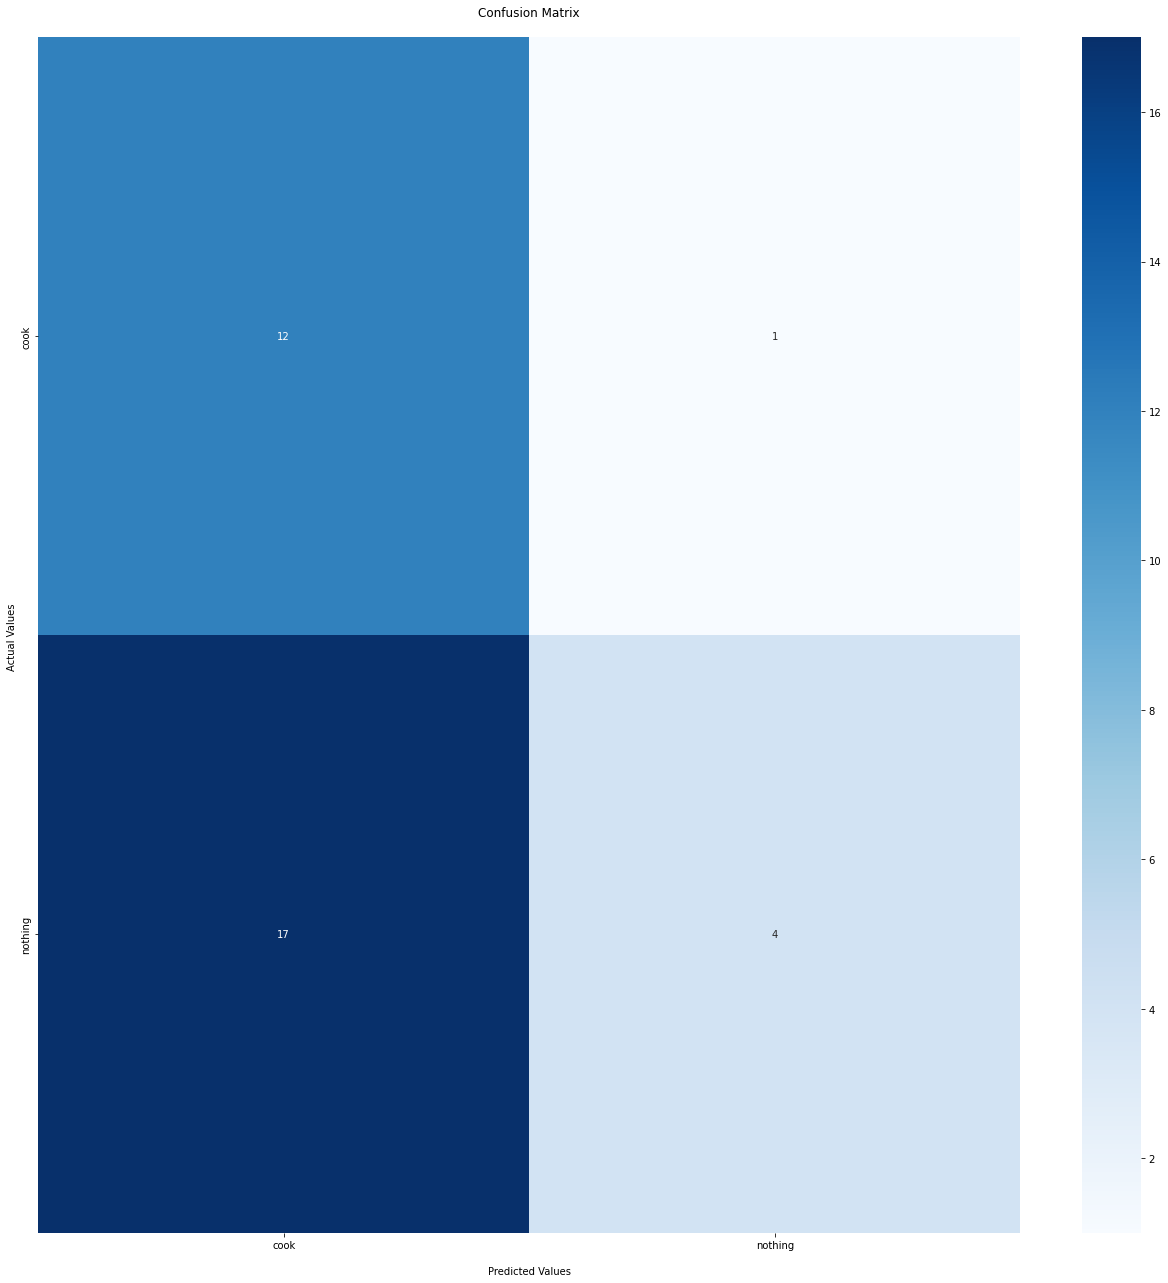

In [17]:
plt.figure(figsize = (22, 22))
cf_matrix = confusion_matrix(test_labels,predictions.round())
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(le2.classes_)
ax.yaxis.set_ticklabels(le2.classes_, rotation=90, va="center")
